In [1]:
#by Terry Zhang in Mystic coders

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
month1 = pd.read_csv('compare_month_1.csv', low_memory=False)
month2 = pd.read_csv('compare_month_2.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [4]:
month1['DY'] = pd.to_numeric(month1['DY'])
month2['DY'] = pd.to_numeric(month2['DY'])
month1['MO'] = pd.to_numeric(month1['MO'])
month2['MO'] = pd.to_numeric(month2['MO'])
month1['ALLSKY_SFC_SW_DWN'] = pd.to_numeric(month1['ALLSKY_SFC_SW_DWN'])
month2['ALLSKY_SFC_SW_DWN'] = pd.to_numeric(month2['ALLSKY_SFC_SW_DWN'])
month1['ALLSKY_NKT'] = pd.to_numeric(month1['ALLSKY_NKT'])
month2['ALLSKY_NKT'] = pd.to_numeric(month2['ALLSKY_NKT'])

In [5]:
sub1 = month1[['DY','ALLSKY_SFC_SW_DWN', 'ALLSKY_NKT']].replace(-999, np.nan)
sub2 = month2[['DY', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_NKT']].replace(-999, np.nan)
sub1 = sub1.dropna(subset=['ALLSKY_SFC_SW_DWN'])
sub2 = sub2.dropna(subset=['ALLSKY_SFC_SW_DWN'])

In [6]:
sub2 = sub2.rename(columns={"ALLSKY_SFC_SW_DWN": "ALLSKY_SFC_SW_DWN_2", "ALLSKY_NKT": "ALLSKY_NKT_2"})

In [7]:
sub3 = sub1.set_index('DY').join(sub2.set_index('DY'))

Text(0.5, 1.0, 'Line Plot for comparsion of solar irradiance')

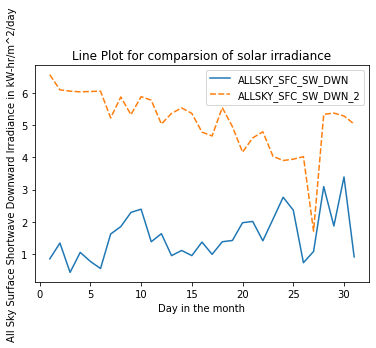

In [8]:
sub4 = sub3[['ALLSKY_SFC_SW_DWN','ALLSKY_SFC_SW_DWN_2']]
%matplotlib inline
sns.lineplot(data=sub4)
plt.xlabel('Day in the month')
plt.ylabel('All Sky Surface Shortwave Downward Irradiance in kW-hr/m^2/day')
plt.title('Line Plot for comparsion of solar irradiance')

In [9]:
radiance_mean = sub1['ALLSKY_SFC_SW_DWN'].mean()
radiance_max = sub1['ALLSKY_SFC_SW_DWN'].max()
radiance_min = sub1['ALLSKY_SFC_SW_DWN'].min()
cloudclearness_mean = sub1['ALLSKY_NKT'].mean()
cloudclearness_max = sub1['ALLSKY_NKT'].max()
cloudclearness_min = sub1['ALLSKY_NKT'].min()

Text(0.5, 1.0, 'Line Plot Plot for comparsion of skyclearness index')

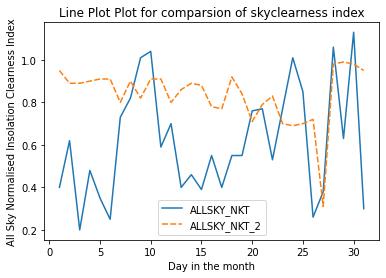

In [10]:
sub5 = sub3[['ALLSKY_NKT','ALLSKY_NKT_2']]
%matplotlib inline
sns.lineplot(data=sub5)
plt.xlabel('Day in the month')
plt.ylabel('All Sky Normalised Insolation Clearness Index')
plt.title('Line Plot Plot for comparsion of skyclearness index')

In [11]:
radiance_mean_2 = sub2['ALLSKY_SFC_SW_DWN_2'].mean()
radiance_max_2 = sub2['ALLSKY_SFC_SW_DWN_2'].max()
radiance_min_2 = sub2['ALLSKY_SFC_SW_DWN_2'].min()
cloudclearness_mean_2 = sub2['ALLSKY_NKT_2'].mean()
cloudclearness_max_2 = sub2['ALLSKY_NKT_2'].max()
cloudclearness_min_2 = sub2['ALLSKY_NKT_2'].min()

In [12]:
month1_name = month1.loc[1, 'MO']
month2_name = month2.loc[1, 'MO']

In [13]:
print(f'For month {month1_name}:')
print(f'The mean of All Sky Surface Shortwave Downward Irradiance in the month is {radiance_mean:.2f} kW-hr/m^2/day')
print(f'The maxmium of All Sky Surface Shortwave Downward Irradiance in the month is {radiance_max:.2f} kW-hr/m^2/day')
print(f'The minimum of All Sky Surface Shortwave Downward Irradiance in the month is {radiance_min:.2f} kW-hr/m^2/day')
print(f'The mean of All Sky Insolation Clearness Index in the month is {cloudclearness_mean*100:.2f} %')
print(f'The maxmium of All Sky Insolation Clearness Index in the month is {cloudclearness_max*100:.2f} %')
print(f'The minimum of All Sky Insolation Clearness Index in the month is {cloudclearness_min*100:.2f} %')

For month 1:
The mean of All Sky Surface Shortwave Downward Irradiance in the month is 1.55 kW-hr/m^2/day
The maxmium of All Sky Surface Shortwave Downward Irradiance in the month is 3.39 kW-hr/m^2/day
The minimum of All Sky Surface Shortwave Downward Irradiance in the month is 0.43 kW-hr/m^2/day
The mean of All Sky Insolation Clearness Index in the month is 61.10 %
The maxmium of All Sky Insolation Clearness Index in the month is 113.00 %
The minimum of All Sky Insolation Clearness Index in the month is 20.00 %


In [14]:
print(f'For month {month2_name}:')
print(f'The mean of kilowatt per day of your solar panels in the month is {radiance_mean_2:.2f} kW-day')
print(f'The maxmium of kilowatt per day of your solar panels in the month is {radiance_max_2:.2f} kW-day')
print(f'The minimum of kilowatt per day of your solar panels in the month is {radiance_min_2:.2f} kW-day')
print(f'The mean of All Sky Insolation Clearness Index in the month is {cloudclearness_mean_2*100:.2f} %')
print(f'The maxmium of All Sky Insolation Clearness Index in the month is {cloudclearness_max_2*100:.2f} %')
print(f'The minimum of All Sky Insolation Clearness Index in the month is {cloudclearness_min_2*100:.2f} %')

For month 10:
The mean of kilowatt per day of your solar panels in the month is 5.10 kW-day
The maxmium of kilowatt per day of your solar panels in the month is 6.56 kW-day
The minimum of kilowatt per day of your solar panels in the month is 1.71 kW-day
The mean of All Sky Insolation Clearness Index in the month is 83.48 %
The maxmium of All Sky Insolation Clearness Index in the month is 99.00 %
The minimum of All Sky Insolation Clearness Index in the month is 31.00 %
